<center>GRIP - The Sparks Foundation</center>
<img src='https://media.glassdoor.com/sqll/2143300/the-sparks-foundation-squarelogo-1556515236044.png' width="100" height="100">
 <center><font color=7E4456>Data Science and Business Analytics Internship</font></center>  
<center><font color=7E4456>By Dharmi Manish Mehta</font></center>



<font color=155E64>(Level - Advance)</font>

<font color=155E64>Task 7 : Stock Market Prediction using numerical and textual analysis</font>




<br>

Historical stock prices ( S&P BSE) <br>
Dataset 1: https://finance.yahoo.com/

<br>
India news headlines <br>
Dataset 2: https://bit.ly/36fFPI6 

Importing the libraries

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns


**Uploading Historical dataset csv file**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ^BSESN.csv to ^BSESN.csv


**Reading the dataset and creating data frames**

In [ ]:
stock_data = pd.read_csv("^BSESN.csv")
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-24,41037.011719,41037.011719,40306.359375,40363.230469,40363.230469,8100.0
1,2020-02-25,40497.718750,40536.000000,40220.589844,40281.199219,40281.199219,7300.0
2,2020-02-26,40194.890625,40255.390625,39760.390625,39888.960938,39888.960938,9000.0
3,2020-02-27,39947.800781,39947.800781,39423.269531,39745.660156,39745.660156,9600.0
4,2020-02-28,39087.468750,39087.468750,38219.968750,38297.289063,38297.289063,12700.0


In [ ]:
stock_data.shape #checking the shape of the dataset

(250, 7)

In [ ]:
stock_data.info() #gathering dataset description & looking for null values if any

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       247 non-null    float64
 2   High       247 non-null    float64
 3   Low        247 non-null    float64
 4   Close      247 non-null    float64
 5   Adj Close  247 non-null    float64
 6   Volume     247 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


**Visualizing the dataset by plotting heat map**

Text(0.5, 1.0, 'Visualize average, numberOf, min, max, std, Queartile')

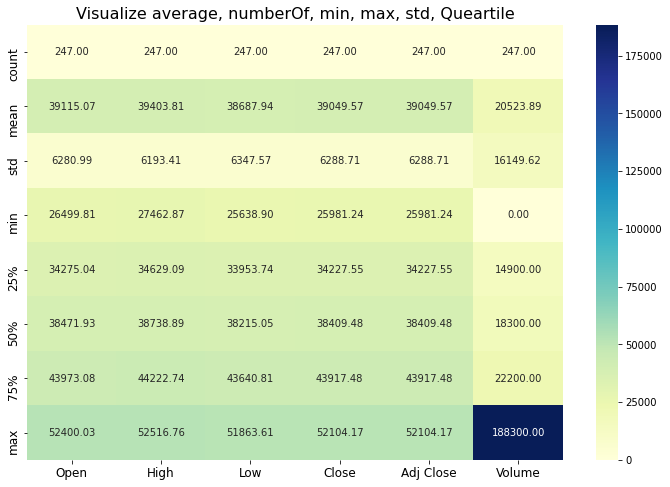

In [ ]:
#plotting the map
plt.figure(figsize=(12, 8))
sns.heatmap(stock_data.describe(), annot = True, fmt = '.2f', cmap = 'YlGnBu')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Visualize average, numberOf, min, max, std, Queartile", fontsize = 16)

**Pre-processing the data by checking for any missing values**

In [ ]:
# checking missing value
print(stock_data.isna().sum())
#Replacing the missing values
stock_data.dropna(inplace=True)



Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64
None


In [ ]:
# Date transform
stock_data['Date'] = pd.to_datetime(stock_data['Date'] ,format='%Y-%m-%d')
stock_data.index = stock_data['Date']


**Plotting the graph for stock price close price and growth, major features required for prediction**

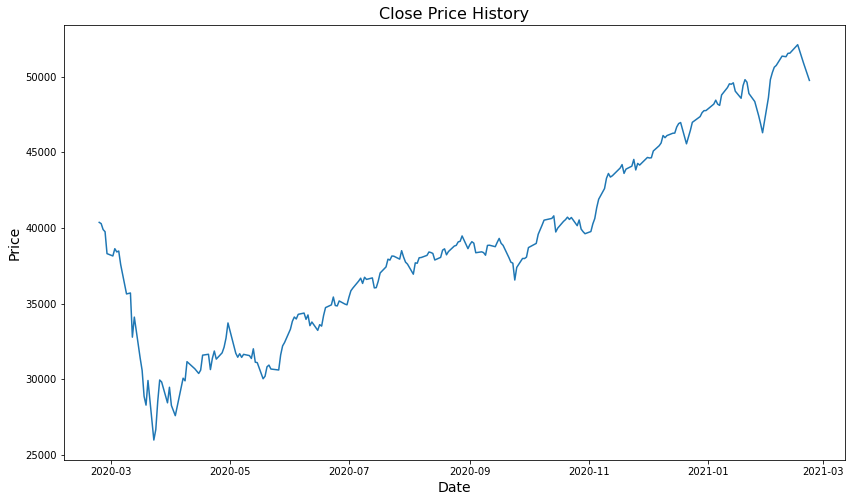

In [ ]:
# Close Price History plot
plt.figure(figsize=(14, 8))
plt.plot(stock_data['Date'], stock_data['Close'])
plt.title("Close Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

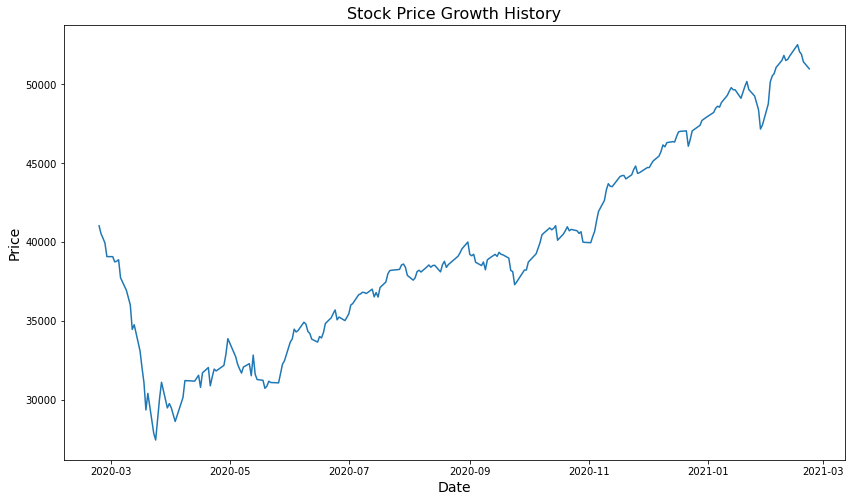

In [ ]:
# Stock Price Growth History plot
plt.figure(figsize=(14, 8))
plt.plot(stock_data['Date'], stock_data['High'])
plt.title("Stock Price Growth History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

**Splitting to input output labels**

In [ ]:
X = stock_data.iloc[:, 1:7].values
y = stock_data.iloc[:, -1].values

**Splitting the entire dataset into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) #splitting the dataset in ratio 70:30

**Using Random Forest Regression for prediction**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train) #training the regressor model

print("The Random Forest Regression model is trained")

The Random Forest Regression model is trained


In [ ]:
y_pred = regressor.predict(X_test)
y_pred


array([20470., 15040., 27540., 19770., 20810., 21890., 24350., 11590.,
       14300., 18400., 22480., 12760., 15680., 19090., 16570., 18940.,
       24340., 20810., 20060., 22940., 18400., 13980., 10970., 27900.,
       18310., 16000., 20040., 15410., 13560., 14340., 16500., 16510.,
       12740., 13560., 33440., 16530., 25170., 15480., 13900., 14430.,
       11440., 15030., 18760.,  6300., 29970., 18460., 22420., 19520.,
       61240., 33100., 16510., 21570., 15030., 15330., 15450., 29970.,
       18400., 15030., 19270., 14180., 10730., 10920., 16770., 11870.,
       21240., 13900., 14600., 20620., 28620.,  9840., 31590., 20810.,
        9610., 24750., 12730.])

In [ ]:
df = pd.DataFrame()
df['predict'] = y_pred
df['predict']

0     20470.0
1     15040.0
2     27540.0
3     19770.0
4     20810.0
       ...   
70    31590.0
71    20810.0
72     9610.0
73    24750.0
74    12730.0
Name: predict, Length: 75, dtype: float64

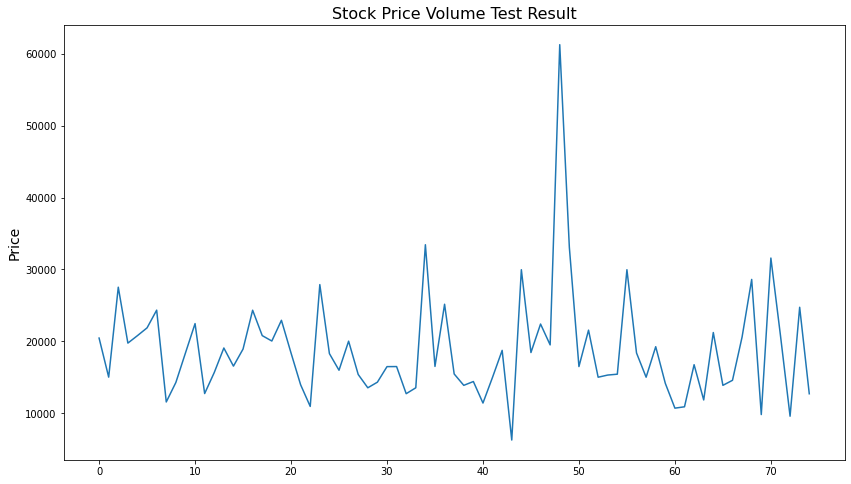

In [ ]:
#plotting the predicted test data
plt.figure(figsize=(14, 8))
plt.plot(df['predict'])
plt.title("Stock Price Volume Test Result", fontsize = 16)
plt.ylabel("Price", fontsize = 14)
plt.show()

In [ ]:
print("Accuracy score : ", np.mean(y_pred==y_test)) #printing the accuracy of the trained model


Accuracy score :  0.09333333333333334


**Performing Sentimental analysis on the news headlines.**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving india-news-headlines.csv to india-news-headlines.csv


**Reading the dataset and storing it in a data frame**

In [ ]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010101,sports.wwe,win over cena satisfying but defeating underta...
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [ ]:
#Displaying the dimensions of the dataset
news_df.shape

(3297172, 3)

In [ ]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3297172 entries, 0 to 3297171
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 75.5+ MB


In [ ]:
# Droping the category column from the dataframe and formating the publised date into Y/M/D format
news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [ ]:
# Renaming the publish_date column to date
news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

In [ ]:
# Drop duplicates column and resetting index
news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-01,win over cena satisfying but defeating underta...
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa


In [ ]:
#Fettching the first 6000 value from the dataframe
news_df = news_df[:6000]

**Creating the feature model**

In [ ]:
#Using textBlob library to generate the subjectivity and polarity of a statement
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

,Date,headline_text,Subjectivity,Polarity
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000
2,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000
3,2001-01-02,America's unwanted heading for India?,0.000000,0.000000
4,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.000000


In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 8.9MB/s 


**Performing Sentimental Analysis**

In [ ]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

senti_ana = SentimentIntensityAnalyzer()

In [ ]:
news_df['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df['headline_text']]
news_df['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df['headline_text']]
news_df['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df['headline_text']]
news_df['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df['headline_text']]

news_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-01,win over cena satisfying but defeating underta...,0.633333,0.433333,-0.0000,0.230,0.473,0.297
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000,0.2924,0.000,0.805,0.195
2,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.0000,0.000,1.000,0.000
3,2001-01-02,America's unwanted heading for India?,0.000000,0.000000,-0.2263,0.322,0.678,0.000
4,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.000000,0.0000,0.000,1.000,0.000
